<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221216_Salary_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2022/10/31/salary-prediction-with-machine-learning/

In [52]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data = pd.read_csv('https://statso.io/wp-content/uploads/2022/10/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.columns = [i.lower() for i in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearsexperience  30 non-null     float64
 1   salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
px.scatter(data, x='yearsexperience', y='salary', trendline='ols', size='yearsexperience', title='Relationship between years of experience and salary').show()

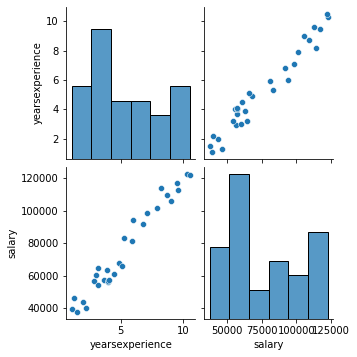

In [32]:
sns.pairplot(data)

In [20]:
x = data[['yearsexperience']].to_numpy()
y = data[['salary']].to_numpy()

In [21]:
x.shape, y.shape

((30, 1), (30, 1))

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((24, 1), (6, 1), (24, 1), (6, 1))

In [34]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain)

0.9581241667244674

In [35]:
ypred = model.predict(xtest)

In [39]:
print('R2 score: ', round(metrics.r2_score(ypred, ytest),2))
print('Mean Squared Error: ', round(metrics.mean_squared_error(ypred, ytest),2))
print('Root mean squared error: ', round(np.sqrt(metrics.mean_squared_error(ypred, ytest)),2))
print('Mean absolute error: ', round(metrics.mean_absolute_error(ytest, ypred),2))

R2 score:  0.93
Mean Squared Error:  50934812.92
Root mean squared error:  7136.86
Mean absolute error:  6246.5


In [40]:
residual = ytest - ypred
residual

array([[-2171.90300316],
       [-7995.53596521],
       [10871.9456941 ],
       [ 1114.62161114],
       [-7879.38466247],
       [-7445.59146742]])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



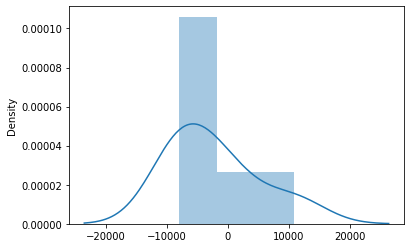

In [41]:
sns.distplot(residual)

In [54]:
data_dep = data['salary']
data_indep = data['yearsexperience']
results = sm.OLS(data_indep, data_dep).fit()
results.predict(data_indep)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        yearsexperience   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                    2.56e-24
Time:                        17:00:27   Log-Likelihood:                         -42.105
No. Observations:                  30   AIC:                                      86.21
Df Residuals:                      29   BIC:                                      87.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
salary      7.341e-05   2.27e-06     32.376      0.000    6.88e-05    7.81e-05
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.709
Skew:                           0.152   Prob(JB):                        0.701
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
years_of_exp = [1.4, 5.0, 3, 15, 21.4, 12]

In [56]:
for i in years_of_exp:
  print(f'Predicted Salary for {i} years of experience: ', model.predict(np.array([[i]])))

Predicted Salary for 1.4 years of experience:  [[40546.06685312]]
Predicted Salary for 5.0 years of experience:  [[73578.17785753]]
Predicted Salary for 3 years of experience:  [[55227.0050773]]
Predicted Salary for 15 years of experience:  [[165334.04175867]]
Predicted Salary for 21.4 years of experience:  [[224057.7946554]]
Predicted Salary for 12 years of experience:  [[137807.28258833]]
